In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [214]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/interval vs r-r values/remainingdata.csv")

In [215]:
df.head(1000)

,sno,rrvalues
0,4000,0.663
1,4001,0.667
2,4002,0.675
3,4003,0.682
4,4004,0.684
...,...,...
995,4995,0.781
996,4996,0.758
997,4997,0.747
998,4998,0.761


In [216]:
df.describe()

,sno,rrvalues
count,1112.000000,1112.000000
mean,4555.500000,0.719023
std,321.151055,0.065043
min,4000.000000,0.583000
25%,4277.750000,0.671000
50%,4555.500000,0.705000
75%,4833.250000,0.767000
max,5111.000000,1.409000


In [217]:
df.shape

(1112, 2)

In [218]:
cdf = df[['sno','rrvalues']]
cdf.head(5)

,sno,rrvalues
0,4000,0.663
1,4001,0.667
2,4002,0.675
3,4003,0.682
4,4004,0.684


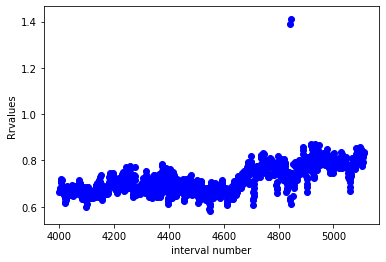

In [219]:
#graph of SNO vs r-r values

plt.scatter(cdf.sno, cdf.rrvalues,color='blue')
plt.xlabel('interval number')
plt.ylabel('Rrvalues')
plt.show()

In [220]:
#splitting our data in 80-20 ratio for regression

In [221]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

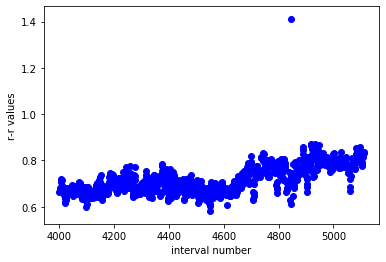

In [222]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.sno, train.rrvalues,  color='blue')
plt.xlabel("interval number")
plt.ylabel("r-r values")
plt.show()

In [223]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sno']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00012762]]
Intercept:  [0.13760437]


Text(0, 0.5, 'r-r values')

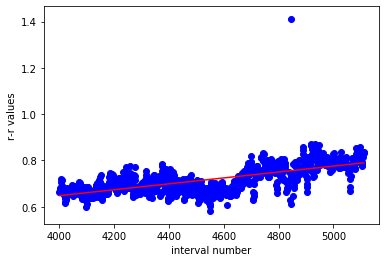

In [224]:
plt.scatter(train.sno, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("interval number")
plt.ylabel("r-r values")

In [225]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['sno']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -1.11


In [226]:
#using polynomial regression

In [227]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['sno']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['sno']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000000e+00, 4.0000000e+03, 1.6000000e+07],
       [1.0000000e+00, 4.0020000e+03, 1.6016004e+07],
       [1.0000000e+00, 4.0030000e+03, 1.6024009e+07],
       ...,
       [1.0000000e+00, 5.1080000e+03, 2.6091664e+07],
       [1.0000000e+00, 5.1100000e+03, 2.6112100e+07],
       [1.0000000e+00, 5.1110000e+03, 2.6122321e+07]])

In [228]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.37471550e-03  1.64962442e-07]]
Intercept:  [3.54126412]


Text(0, 0.5, 'r-rvalues')

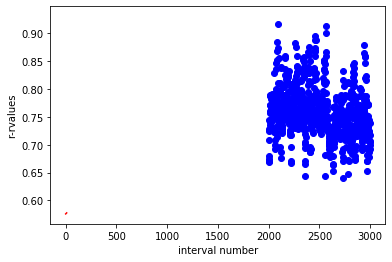

In [195]:
#plotting the polynomial regression
plt.scatter(train.sno, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [229]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.67
